## Project Overview
A jewelry company wants to put in a bid to purchase a large set of diamonds, but is unsure how much it should bid. In this project, you will use the results from a predictive model to make a recommendation on how much the jewelry company should bid for the diamonds.

## US Number System
All numbers that will be presented in this Nanodegree program will be based on the US numbering system where 5,269 is "five thousand two hundred sixty nine" and 158.1 is "one hundred fifty eight point one" where 1 is a decimal number. This is very important so please take note of this.

The linear regression model provides an equation that you can use to predict diamond prices for the set of 3,000 diamonds. The equation is below:

**Price** = -5,269 + 8,413 x **Carat** + 158.1 x **Cut** + 454 x **Clarity**

### Step 1 – Understand the data: There are two datasets.

* diamonds.csv contains the data used to build the regression model.
* new_diamonds.csv contains the data for the diamonds the company would like to purchase.

In [1]:
# Loading files
import pandas as pd

df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   carat        50000 non-null  float64
 2   cut          50000 non-null  object 
 3   cut_ord      50000 non-null  int64  
 4   color        50000 non-null  object 
 5   clarity      50000 non-null  object 
 6   clarity_ord  50000 non-null  int64  
 7   price        50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


In [3]:
df.describe()

,Unnamed: 0,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,0.798597,3.903980,4.126700,3939.103500
std,14433.901067,0.474651,1.117043,1.665564,3995.879832
min,1.000000,0.200000,1.000000,1.000000,326.000000
25%,12500.750000,0.400000,3.000000,3.000000,948.000000
50%,25000.500000,0.700000,4.000000,4.000000,2402.500000
75%,37500.250000,1.040000,5.000000,5.000000,5331.000000
max,50000.000000,5.010000,5.000000,8.000000,18823.000000


<AxesSubplot:xlabel='carat', ylabel='price'>

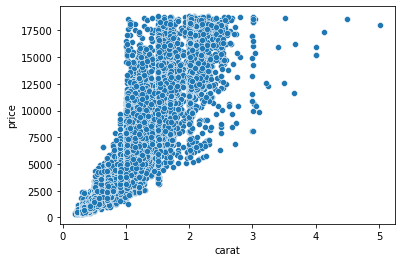

In [4]:
import seaborn as sns
 
sns.scatterplot(x="carat",
                y="price",
                data=df)

<AxesSubplot:xlabel='carat', ylabel='log price'>

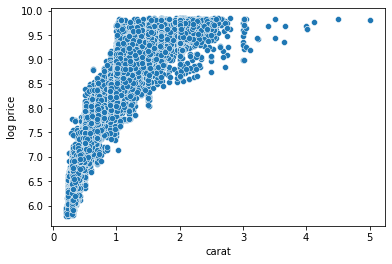

In [5]:
# Graph above looks like an exponential so I will just test using to log price to see if looks more like a linear function
import math

df['log price'] = pd.Series([math.log(x) for x in df.price.values])
sns.scatterplot(x="carat",
                y="log price",
                data=df)

<AxesSubplot:xlabel='cut_ord', ylabel='price'>

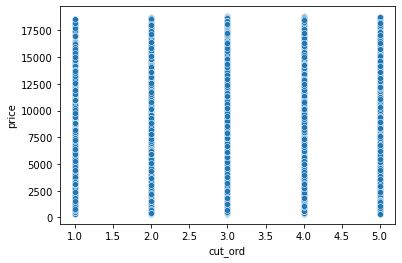

In [6]:
sns.scatterplot(x="cut_ord",
                y="price",
                data=df)

<AxesSubplot:xlabel='clarity_ord', ylabel='price'>

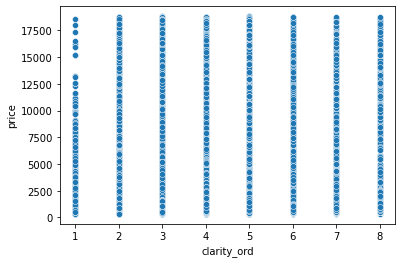

In [7]:
sns.scatterplot(x="clarity_ord",
                y="price",
                data=df)

### Step 2 – Calculate the predicted price for diamond:

In [8]:
df_test = pd.read_csv('new-diamonds.csv')
df_test.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


### Step 3 – Make a recommendation:
Now that you have the predicted price for each diamond, it’s time to calculate the bid price for the whole set. Note: The diamond price that the model predicts represents the final retail price the consumer will pay. The company generally purchases diamonds from distributors at 70% of that price, so your recommended bid price should represent that.

### Calculating theoretical price based on the calculated regression

In [9]:
df_test['calc_price'] = -5269 + 8413 * df_test['carat'] + 158.1 * df_test['cut_ord'] + 454 * df_test['clarity_ord']
df_test.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,calc_price
0,1,1.22,Premium,4,G,SI1,3,6989.26
1,2,1.01,Good,2,G,VS2,5,5814.33
2,3,0.71,Very Good,3,I,VS2,5,3448.53
3,4,1.01,Ideal,5,D,SI2,2,4926.63
4,5,0.27,Ideal,5,H,VVS2,6,517.01


In [11]:
df_test[['calc_price']].describe()

,calc_price
count,3000.000000
mean,3911.174253
std,3779.626227
min,-1961.870000
25%,1021.790000
50%,2872.650000
75%,5885.410000
max,21278.330000


### Calculated maximum price based on wholesale price

In [12]:
df_test['max_purchase_price'] = df_test['calc_price'] * 0.7
df_test.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,calc_price,max_purchase_price
0,1,1.22,Premium,4,G,SI1,3,6989.26,4892.482
1,2,1.01,Good,2,G,VS2,5,5814.33,4070.031
2,3,0.71,Very Good,3,I,VS2,5,3448.53,2413.971
3,4,1.01,Ideal,5,D,SI2,2,4926.63,3448.641
4,5,0.27,Ideal,5,H,VVS2,6,517.01,361.907


In [13]:
df_test[['max_purchase_price']].describe()

,max_purchase_price
count,3000.000000
mean,2737.821977
std,2645.738359
min,-1373.309000
25%,715.253000
50%,2010.855000
75%,4119.787000
max,14894.831000


## Project Submission
To complete this project, you will be submitting a file in pdf format that contains the answers to the following questions across three steps.

**Step 1 - Understanding the Model:**

According to the linear model provided, if a diamond is 1 carat heavier than another with the same cut and clarity, how much more would the retail price of the heavier diamond be? Why?

If you were interested in a 1.5 carat diamond with a Very Good cut (represented by a 3 in the model) and a VS2 clarity rating (represented by a 5 in the model), what retail price would the model predict for the diamond?

According to the regression, a 1 carat heavier diamond would entail an USD 8,413 premium.

In [ ]:
carat = 1.5
cut_ord = 3
clarity_ord = 5
-5269 + 8413 * carat + 158.1 * cut_ord + 454 * clarity_ord

A 1.5 carat with a 3 cut and an 5 clarity would have a retail price of USD 10,094.8 according to the model.

**Step 2 - Visualize the Data:** 

Create two scatter plots. If you're not sure what a scatter plot is, see here.

* Plot 1 - Plot the data for the diamonds in the database, with carat on the x-axis and price on the y-axis.
* Plot 2 - Plot the data for the diamonds for which you are predicting prices with carat on the x-axis and predicted price on the y-axis.
* Note: You can also plot both sets of data on the same chart in different colors.
* What strikes you about this comparison? After seeing this plot, do you feel confident in the model’s ability to predict prices?

<AxesSubplot:xlabel='carat', ylabel='price'>

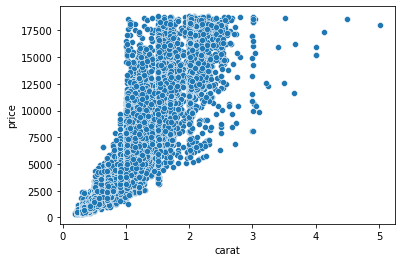

In [15]:
sns.scatterplot(x="carat",
                y="price",
                data=df)

<AxesSubplot:xlabel='carat', ylabel='calc_price'>

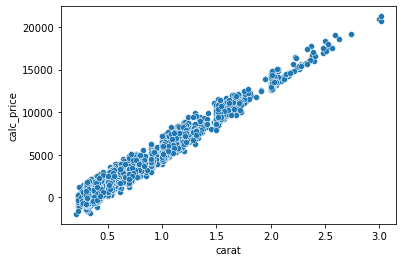

In [16]:
sns.scatterplot(x="carat",
                y="calc_price",
                data=df_test)

It seems far from perfect but a reasonable approximation as long as I use a big enough discount in the purchase price.

**Step 3 - The Recommendation:**

What bid do you recommend for the jewelry company? Please explain how you arrived at that number.

In [19]:
df_test['max_purchase_price'].sum()

8213465.931999999

In [20]:
df_test['max_purchase_price'].sum()/0.7

11733522.76

We should purchase the whole lot for around USD 8.2MM for a resale price of around USD 11.7MM.

## Calculating the regression ourselves just for fun

### Preparing the data for the regression

In [22]:
# Getting the values for the features and dependent variable
X = df[['carat', 'cut_ord', 'clarity_ord']].values
Y = df['price'].values

### Using statsmodel

In [23]:
import statsmodels.api as sm

x = sm.add_constant(X) # adicionando o cálculo da constante beta0
y = sm.OLS(Y, x).fit() # instanciando o meu modelo, passando as variáveis + treinar o modelo

In [24]:
y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.298e+05
Date:                Tue, 22 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:15:54   Log-Likelihood:            -4.3126e+05
No. Observations:               50000   AIC:                         8.625e+05
Df Residuals:                   49996   BIC:                         8.626e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5255.2231     30.320   -173.326      0.000   -5314.650   -5195.796
x1          8363.4167     13.565    616.547      0.000    8336.829    8390.004
x2           160.3786      5.513     29.093      0.000     149.574     171.183
x3           457.8018      3.901    117.366      0.000     450.157     465.447
==============================================================================
Omnibus:                    11093.961   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169582.750
Skew:                           0.651   Prob(JB):                         0.00
Kurtosis:                      11.928   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using sklearn

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

In [26]:
lr.intercept_

-5255.2231464773695

In [27]:
lr.coef_

array([8363.41665765,  160.37858283,  457.80181294])

### Regression results

The results were quite similar but not exactly the same to the numbers provided in the exercise.